In [2]:
from __future__ import absolute_import, division, print_function
from keras.models import Sequential
from keras.callbacks import EarlyStopping
from keras.layers.core import (
    Activation, Dense, Dropout, Flatten,
    Permute, Reshape, TimeDistributedDense
)
from keras.layers.convolutional import Convolution2D, MaxPooling2D
from keras.layers.recurrent import GRU
from keras.regularizers import l1, l2, l1l2
from keras.utils import np_utils
from keras import backend as K
import numpy as np
import copy
import matplotlib.pyplot as plt
import pandas as pd
import sys
import os
import time
import re
import numpy as np
from collections import OrderedDict
from sklearn.metrics import auc, log_loss, precision_recall_curve, roc_auc_score
from sklearn.model_selection import StratifiedShuffleSplit, train_test_split

Using Theano backend.
Using gpu device 0: GeForce GTX 1080 (CNMeM is enabled with initial size: 82.0% of memory, cuDNN 5005)
/home/alvin/Dropbox/Lab/CNN/deeplift/env/local/lib/python2.7/site-packages/theano/tensor/signal/downsample.py:6: UserWarning: downsample module has been moved to the theano.tensor.signal.pool module.
  "downsample module has been moved to the theano.tensor.signal.pool module.")


In [3]:
import keras

In [4]:
keras.__version__

'0.3.2'

In [5]:
    dna_files = ["/home/alvin/Dropbox/Lab/CNN/data/processed_cnn/HEPG2_act_mpra_dna.txt", "/home/alvin/Dropbox/Lab/CNN/data/processed_cnn/HEPG2_rep_mpra_dna.txt", "/home/alvin/Dropbox/Lab/CNN/data/processed_cnn/K562_act_mpra_dna.txt", "/home/alvin/Dropbox/Lab/CNN/data/processed_cnn/K562_rep_mpra_dna.txt", "/home/alvin/Dropbox/Lab/CNN/data/processed_cnn/LCL/LCL_act_mpra_dna.txt"]
    target_files = ["/home/alvin/Dropbox/Lab/CNN/data/processed_cnn/HEPG2_act_mpra_tar.txt", "/home/alvin/Dropbox/Lab/CNN/data/processed_cnn/HEPG2_rep_mpra_tar.txt", "/home/alvin/Dropbox/Lab/CNN/data/processed_cnn/K562_act_mpra_tar.txt", "/home/alvin/Dropbox/Lab/CNN/data/processed_cnn/K562_rep_mpra_tar.txt", "/home/alvin/Dropbox/Lab/CNN/data/processed_cnn/LCL/LCL_act_mpra_tar.txt"]
    anno_files = ["/home/alvin/Dropbox/Lab/CNN/data/processed_cnn/HEPG2_act_mpra_det.txt", "/home/alvin/Dropbox/Lab/CNN/data/processed_cnn/HEPG2_rep_mpra_det.txt", "/home/alvin/Dropbox/Lab/CNN/data/processed_cnn/K562_act_mpra_det.txt", "/home/alvin/Dropbox/Lab/CNN/data/processed_cnn/K562_rep_mpra_det.txt", "/home/alvin/Dropbox/Lab/CNN/data/processed_cnn/LCL/LCL_act_mpra_det.txt"]
    output_dirs = ["./HEPG2_act/", "./HEPG2_rep/", "./K562_act/", "./K562_rep/", "./LCL_act/"]
    names = ["HEPG2_act", "HEPG2_rep", "K562_act", "K562_rep", "LCL_act"]
    status = ["act", "rep", "act", "rep", "act"]

In [6]:
%matplotlib inline
import seaborn as sns; sns.set(style="white", color_codes=True)
from scipy.stats.mstats import zscore


In [7]:
import emvar_cat_model
reload(emvar_cat_model)

/home/alvin/Dropbox/Lab/CNN/deeplift/env/local/lib/python2.7/site-packages/sklearn/cross_validation.py:44: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)
/home/alvin/Dropbox/Lab/CNN/deeplift/env/local/lib/python2.7/site-packages/sklearn/grid_search.py:43: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. This module will be removed in 0.20.
  DeprecationWarning)


<module 'emvar_cat_model' from 'emvar_cat_model.pyc'>

In [10]:
multiClassObj = emvar_cat_model.MultiClassProcessor(dna_files, target_files, anno_files, status, type = "cat")

In [11]:
X_train, X_test, Y_train, Y_test = multiClassObj.return_test_train()

In [16]:
neg_weight, neutral_weight, pos_weight = multiClassObj.cat_weights()

In [15]:
modelObj = emvar_cat_model.CatModel(verbose= 1, seq_length = 150)
modelObj.model2()


NameError: name 'neutral_weight' is not defined

In [17]:
modelObj.model.fit(X_train, Y_train, batch_size=250, nb_epoch = 25,verbose = 1, class_weight= {0:neg_weight, 1:neutral_weight, 2:pos_weight}, validation_data = (X_test, Y_test))

Epoch 1/25
56688/56688 [==============================] - 16s - loss: 7.8832    
Epoch 2/25
56688/56688 [==============================] - 16s - loss: 4.5003    
Epoch 3/25
56688/56688 [==============================] - 16s - loss: 3.5685    
Epoch 4/25
56688/56688 [==============================] - 16s - loss: 3.1873    
Epoch 5/25
56688/56688 [==============================] - 16s - loss: 2.9762    
Epoch 6/25
56688/56688 [==============================] - 16s - loss: 2.7499    
Epoch 7/25
56688/56688 [==============================] - 16s - loss: 2.5605    
Epoch 8/25
56688/56688 [==============================] - 16s - loss: 2.4358    
Epoch 9/25
56688/56688 [==============================] - 16s - loss: 2.2836    
Epoch 10/25
56688/56688 [==============================] - 16s - loss: 2.2155    
Epoch 11/25
56688/56688 [==============================] - 16s - loss: 2.1384    
Epoch 12/25
56688/56688 [==============================] - 16s - loss: 2.0215    
Epoch 13/25
56688/56688 [

In [19]:
classObj = modelObj.test(X_test, Y_test)

14173/14173 [==============================] - 0s     


In [22]:
classObj.cat_binary(Y_test, classObj.flat_predictions )

Class 1 Performance
0.3611	74.3500	0.7987	0.3637	0.9658	2.1997	2.5381	2.8765	591.0000	13582.0000
Class 2 Performance
1.3458	66.9971	0.8262	0.9616	0.4242	82.0146	97.7427	100.0000	12360.0000	1813.0000
Class 3 Performance
1.0000	72.7856	0.8457	0.4627	0.9302	1.9640	2.2095	2.6187	1222.0000	12951.0000


In [8]:
binObj = emvar_cat_model.CatModel(verbose= 1, seq_length = 150)
binObj.model3()


In [9]:
binClassObj = emvar_cat_model.BinaryClassProcessor(dna_files, target_files, anno_files, status, type = "bin")

In [10]:
binneg, binpos = binClassObj.bin_weights()

In [11]:
binX_train, binX_test, binY_train, binY_test = binClassObj.return_test_train()

In [12]:
binObj.model.fit(binX_train, binY_train, batch_size=400, nb_epoch = 55,verbose = 1, class_weight= {0:binneg, 1:binpos}, validation_data = (binX_test, binY_test))

Train on 56688 samples, validate on 14173 samples
Epoch 1/45
56688/56688 [==============================] - 15s - loss: 6.9142 - val_loss: 0.6567
Epoch 2/45
56688/56688 [==============================] - 15s - loss: 3.6371 - val_loss: 0.3828
Epoch 3/45
56688/56688 [==============================] - 15s - loss: 2.3253 - val_loss: 0.6959
Epoch 4/45
56688/56688 [==============================] - 15s - loss: 1.7788 - val_loss: 0.3550
Epoch 5/45
56688/56688 [==============================] - 15s - loss: 1.5156 - val_loss: 0.7690
Epoch 6/45
56688/56688 [==============================] - 15s - loss: 1.3700 - val_loss: 0.4872
Epoch 7/45
56688/56688 [==============================] - 15s - loss: 1.3004 - val_loss: 0.5926
Epoch 8/45
56688/56688 [==============================] - 15s - loss: 1.2715 - val_loss: 0.4419
Epoch 9/45
56688/56688 [==============================] - 15s - loss: 1.2491 - val_loss: 0.3318
Epoch 10/45
56688/56688 [==============================] - 15s - loss: 1.2109 - val_lo

In [17]:
classObj = binObj.test(binX_test, binY_test)

14173/14173 [==============================] - 0s     


In [18]:
classObj.binary(classObj.flat_labels.astype(bool), classObj.flat_predictions)

[('Loss', 0.4116936252744251),
 ('Balanced_accuracy', 78.179841472143835),
 ('auROC', 0.84879591301227919),
 ('auPRC', 0.53793723542226268),
 ('auPRG', 0.9126607671059056),
 ('Recall_at_5%_FDR', 0.22062879205736349),
 ('Recall_at_10%_FDR', 0.22062879205736349),
 ('Recall_at_20%_FDR', 0.88251516822945397),
 ('Num_Positives', 1813),
 ('Num_Negatives', 12360)]

In [ ]:
from sklearn.metrics import roc_curve, auc
fpr, tpr = roc_curve(classObj.flat_labels.astype(bool), classObj.flat_predictions)

In [ ]:
fpr

In [13]:
ref_file = "/home/alvin/Dropbox/Lab/CNN/data/processed_cnn/LCL/LCL_act_mpra_emVar_ref.txt"    
alt_file = "/home/alvin/Dropbox/Lab/CNN/data/processed_cnn/LCL/LCL_act_mpra_emVar_alt.txt"
z_file = "/home/alvin/Dropbox/Lab/CNN/data/processed_cnn/LCL/LCL_act_mpra_emVar_tar.txt"
prob_file = "/home/alvin/Dropbox/Lab/CNN/data/processed_cnn/LCL/LCL_act_mpra_emVar_eft.txt"
mutObj = emvar_cat_model.Mutagen(ref_file, alt_file, prob_file, z_file)
mutObj.prepare()

In [14]:
det_file = "/home/alvin/Dropbox/Lab/CNN/data/processed_cnn/LCL/LCL_act_mpra_emVar_det.txt"
det_df = pd.read_csv(det_file, sep = "\t", header = 0)
log_det = det_df["LogSkew.Comb"]

In [15]:
ref_result = binObj.predict(mutObj.ref_tensor)
alt_result = binObj.predict(mutObj.alt_tensor)
diff_result = alt_result - ref_result 

2610/2610 [==============================] - 0s     


In [16]:
log_det.shape

(2610,)

/home/alvin/Dropbox/Lab/CNN/deeplift/env/lib/python2.7/site-packages/ipykernel/__main__.py:2: FutureWarning: reshape is deprecated and will raise in a subsequent release. Please use .values.reshape(...) instead
  from ipykernel import kernelapp as app


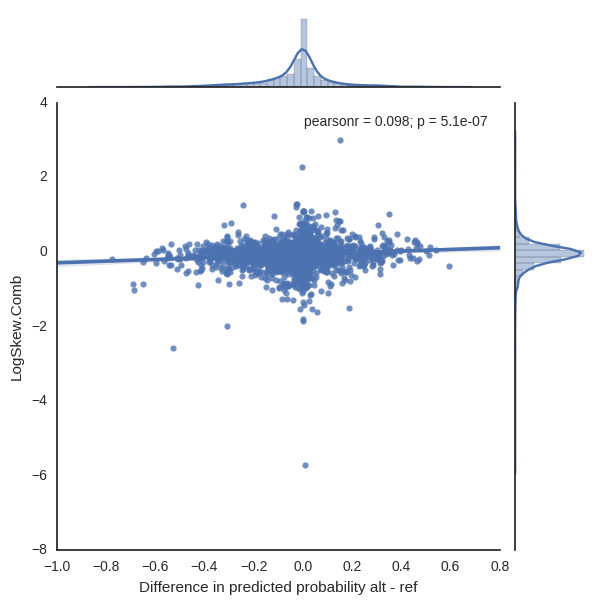

In [17]:
plt.figure(figsize=(12,10))
sns.jointplot(diff_result, log_det.reshape((len(log_det),1)), kind="reg")
plt.xlabel("Difference in predicted probability alt - ref")
plt.ylabel("LogSkew.Comb")

In [71]:
mutObj.Z

0       0
1       1
2       1
3       0
4       0
5       0
6       0
7       0
8       0
9       0
10      0
11      1
12      1
13      0
14      0
15      0
16      0
17      0
18      1
19      0
20      1
21      0
22      1
23      0
24      0
25      1
26      0
27      0
28      0
29      0
       ..
2580    0
2581    0
2582    0
2583    0
2584    1
2585    0
2586    1
2587    0
2588    0
2589    0
2590    0
2591    0
2592    1
2593    0
2594    0
2595    0
2596    0
2597    1
2598    1
2599    0
2600    1
2601    0
2602    0
2603    0
2604    0
2605    1
2606    1
2607    0
2608    0
2609    0
Name: 0, dtype: int64

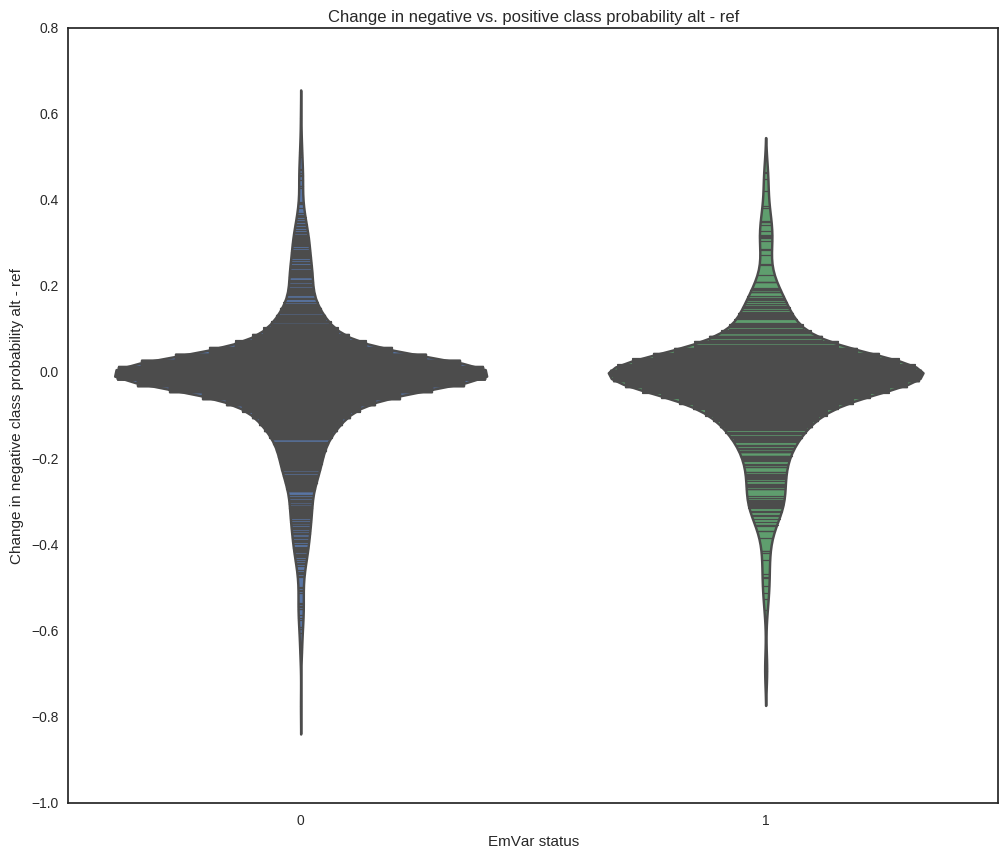

In [18]:
Z = np.asarray(mutObj.Z)
Z = Z.reshape((len(Z)),1)
plt.figure(figsize = (12,10))
plt.clf()
sns.violinplot(Z.flatten(),diff_result.flatten(),inner="stick")
plt.xlabel("EmVar status")
plt.ylabel("Change in negative class probability alt - ref")
plt.title("Change in negative vs. positive class probability alt - ref")

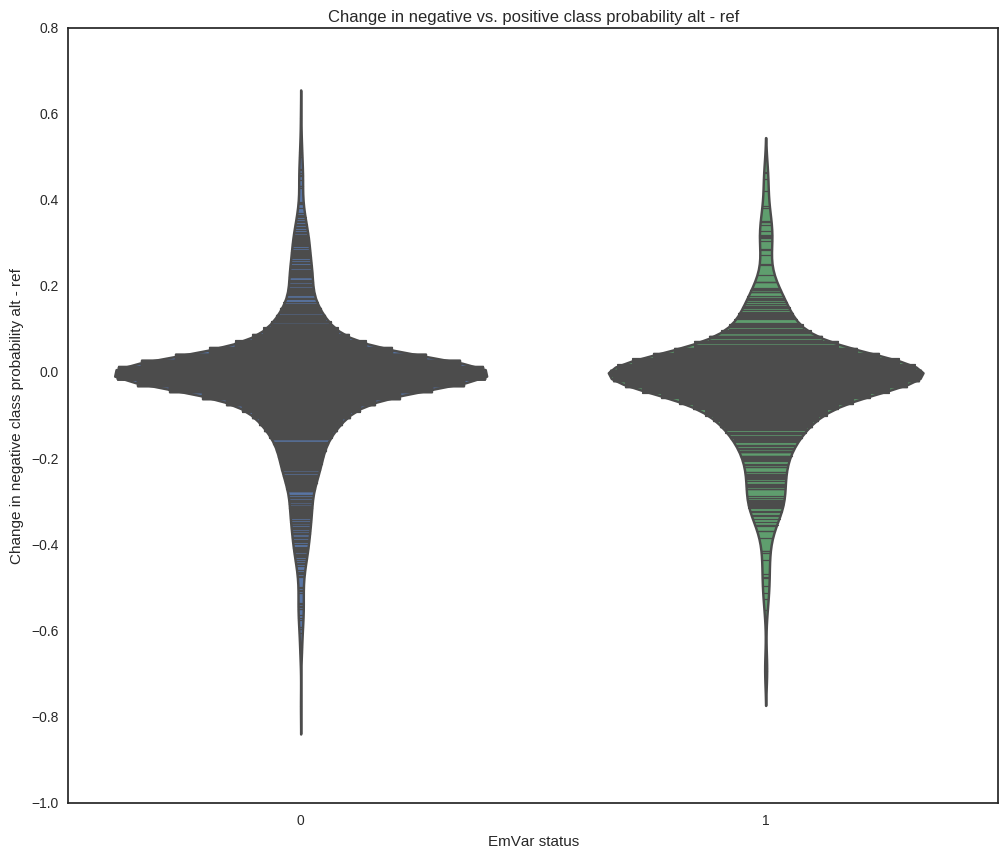

In [19]:
Z = np.asarray(mutObj.Z)
Z = Z.reshape((len(Z)),1)
plt.figure(figsize = (12,10))
plt.clf()
sns.violinplot(Z.flatten(),diff_result.flatten(),inner="stick")
plt.xlabel("EmVar status")
plt.ylabel("Change in negative class probability alt - ref")
plt.title("Change in negative vs. positive class probability alt - ref")

In [79]:
Z

array([[0],
       [1],
       [1],
       ..., 
       [0],
       [0],
       [0]])

In [76]:
import deeplift
from deeplift.conversion import keras_conversion as kc
from deeplift import backend as B

In [89]:
deeplift_model = kc.convert_sequential_model(
                    binObj.model,
                    nonlinear_mxts_mode=deeplift.blobs.NonlinearMxtsMode.GuidedBackpropDeepLIFT)

In [111]:
find_scores_layer_idx = 3
deeplift_contribs_func = deeplift_model.get_target_contribs_func(
                            find_scores_layer_idx=find_scores_layer_idx,
                            target_layer_idx=-2)

In [95]:
def check(vec1,vec2):
    for idx in range(vec1.shape[2]):
        for idx2 in range(vec1.shape[1]):
            if vec1[0,idx2,idx] == vec2[0,idx2,idx]:
                continue
            else:
                print("Detected at %i"%(idx))
                print(vec1[0,idx2,idx])
                print(vec2[0,idx2,idx])



In [112]:
scores_ref = np.array(deeplift_contribs_func(task_idx=0,
                                         input_data_list=[mutObj.alt_tensor],
                                         input_references_list=[mutObj.ref_tensor],
                                         batch_size=100,
                                         progress_update=1000))

Done 0
Done 1000
Done 2000


In [113]:
scores_ref

array([[[[ 0.,  0.,  0., ...,  0.,  0.,  0.]],

        [[ 0.,  0.,  0., ...,  0.,  0.,  0.]],

        [[ 0.,  0.,  0., ...,  0.,  0.,  0.]],

        ..., 
        [[ 0.,  0.,  0., ...,  0.,  0.,  0.]],

        [[ 0.,  0.,  0., ...,  0.,  0.,  0.]],

        [[ 0.,  0.,  0., ...,  0.,  0.,  0.]]],


       [[[ 0.,  0.,  0., ...,  0.,  0.,  0.]],

        [[ 0.,  0.,  0., ...,  0.,  0.,  0.]],

        [[ 0.,  0.,  0., ...,  0.,  0.,  0.]],

        ..., 
        [[ 0.,  0.,  0., ...,  0.,  0.,  0.]],

        [[ 0.,  0.,  0., ...,  0.,  0.,  0.]],

        [[ 0.,  0.,  0., ...,  0.,  0.,  0.]]],


       [[[ 0.,  0.,  0., ...,  0.,  0.,  0.]],

        [[ 0.,  0.,  0., ...,  0.,  0.,  0.]],

        [[ 0.,  0.,  0., ...,  0.,  0.,  0.]],

        ..., 
        [[ 0.,  0.,  0., ...,  0.,  0.,  0.]],

        [[ 0.,  0.,  0., ...,  0.,  0.,  0.]],

        [[ 0.,  0.,  0., ...,  0.,  0.,  0.]]],


       ..., 
       [[[ 0.,  0.,  0., ...,  0.,  0.,  0.]],

        [[ 0.,  0.,  0., ..

In [114]:
emvar_score = scores_diff[:,:,:,75]

In [54]:
abcd = np.sum(np.abs(abc), axis = 2)

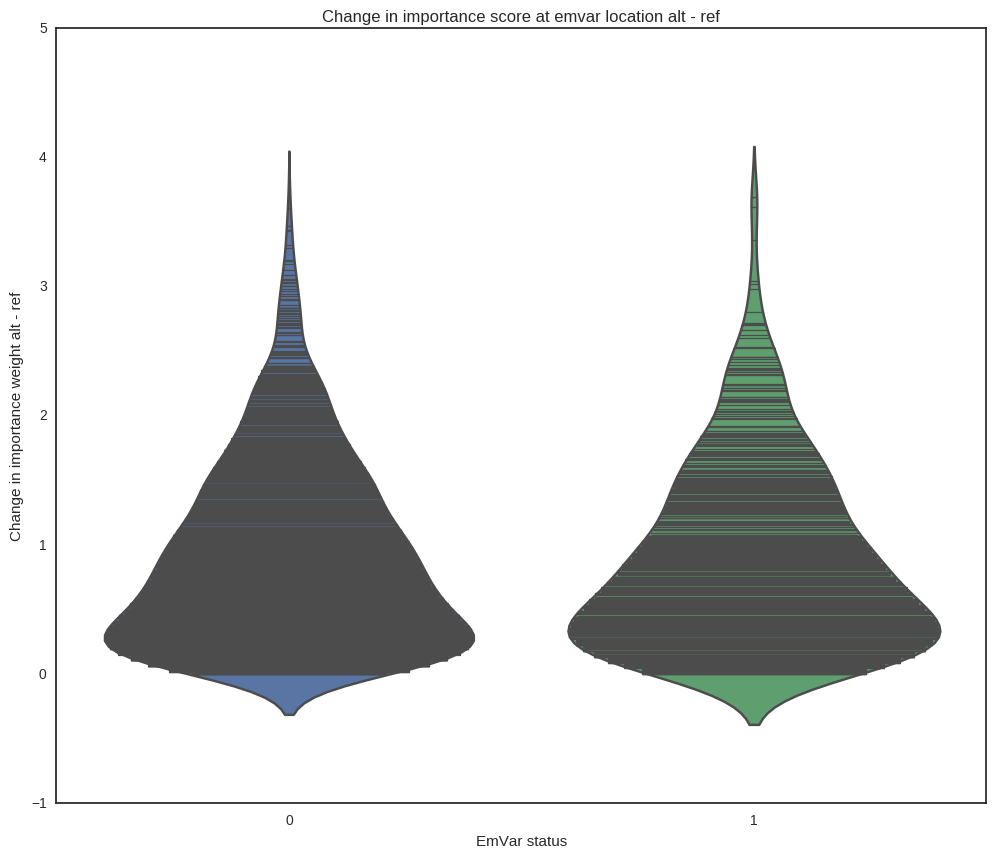

In [55]:
plt.figure(figsize = (12,10))
plt.clf()
sns.violinplot(Z.flatten(),abcd[:,:,75].flatten(),inner="stick")
plt.xlabel("EmVar status")
plt.ylabel("Change in importance weight alt - ref")
plt.title("Change in importance score at emvar location alt - ref")

In [35]:
scores_ref_sum = np.sum(scores_ref, axis = 2)

In [36]:
scores_ref_sum.shape

(2610, 1, 150)

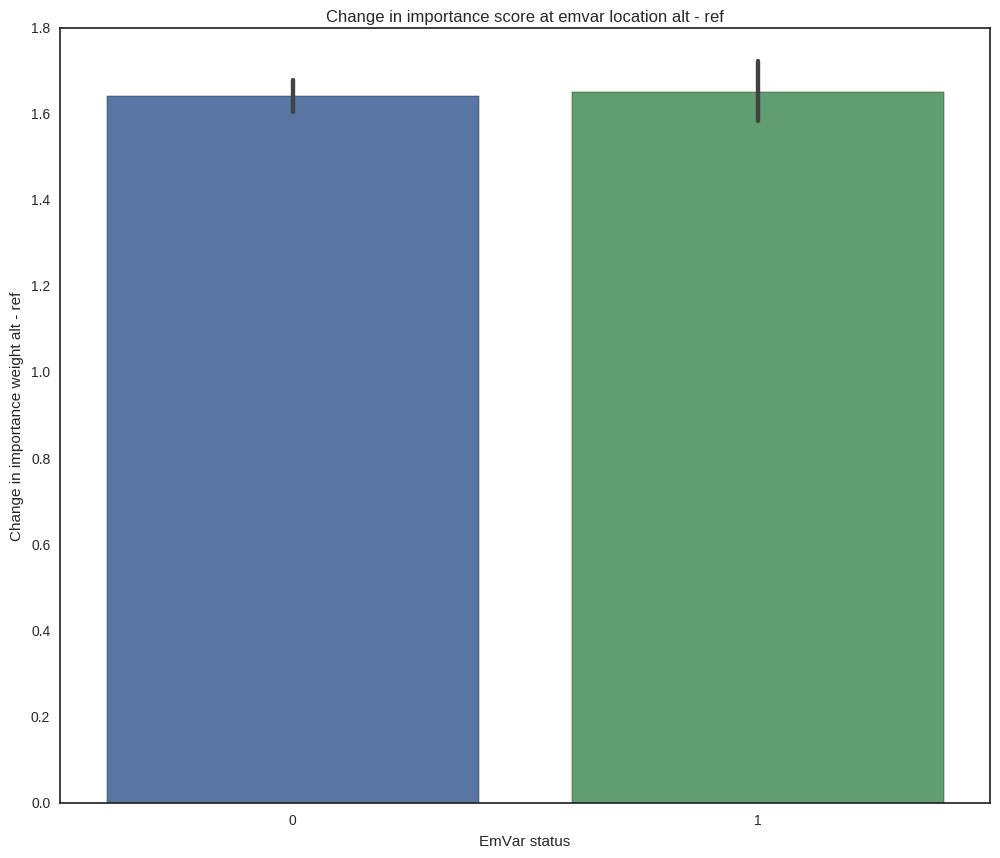

In [72]:
plt.figure(figsize = (12,10))
plt.clf()
sns.barplot(Z.flatten(),np.sum(np.abs(scores_ref), axis = 2)[:,:,75].flatten())
plt.xlabel("EmVar status")
plt.ylabel("Change in importance weight alt - ref")
plt.title("Change in importance score at emvar location alt - ref")

In [53]:
abc = []
for idx in range(scores_ref.shape[0]):
    plot1 = mutObj.alt_tensor[idx] * scores_ref[idx]
    abc.append(plot1)
abc = np.asarray(abc)

In [96]:
scores_ref[0].shape

(1, 4, 150)

In [26]:
from deeplift.visualization import viz_sequence
reload(viz_sequence)

<module 'deeplift.visualization.viz_sequence' from '/home/alvin/Dropbox/Lab/CNN/deeplift/deeplift/deeplift/visualization/viz_sequence.pyc'>

In [66]:
#ref
def visualize_idx_single(idx, score1, tensor1, Z):
    plot1 = tensor1[idx] * score1[idx]
    viz_sequence.plot_weights(plot1, subticks_frequency=5)
    print("Emvar status %i"%(Z.flatten()[idx]))
    return plot1

In [105]:
dot = visualize_idx_single(2,scores_ref, mutObj.alt_tensor, Z)

ValueError: operands could not be broadcast together with shapes (1,4,150) (400,1,143) 

In [99]:

def visualize_idx(idx, score1, score2, tensor1, tensor2, Z):
    diffs = []
    plot1 = tensor1[idx] * score1[idx]
    plot2 = tensor2[idx] * score2[idx]
    plotdiff = plot1-plot2
    diffs.append(plotdiff)
    viz_sequence.plot_weights(plot1, subticks_frequency=5)
    viz_sequence.plot_weights(plot2, subticks_frequency=5)
    viz_sequence.plot_weights(plotdiff, subticks_frequency=5)
    print("Emvar status %i"%(Z.flatten()[idx]))


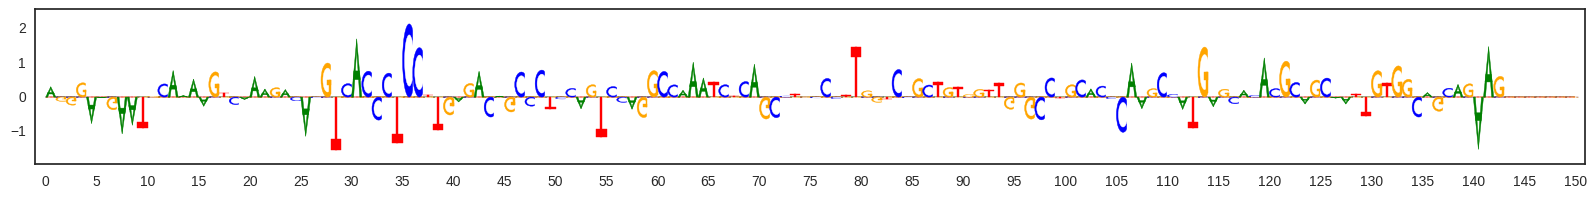

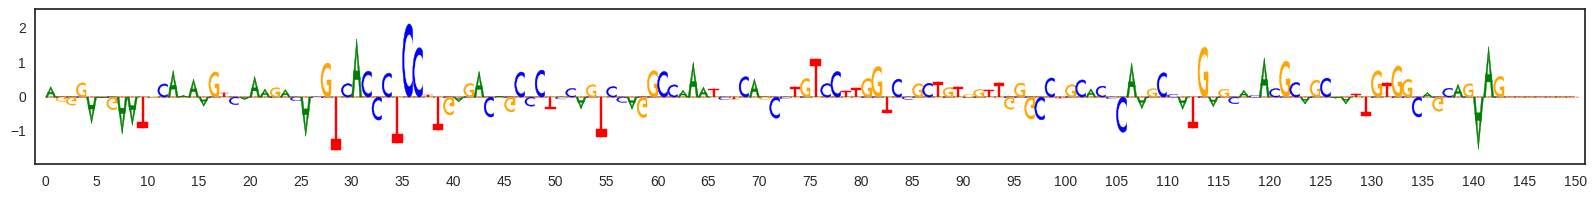

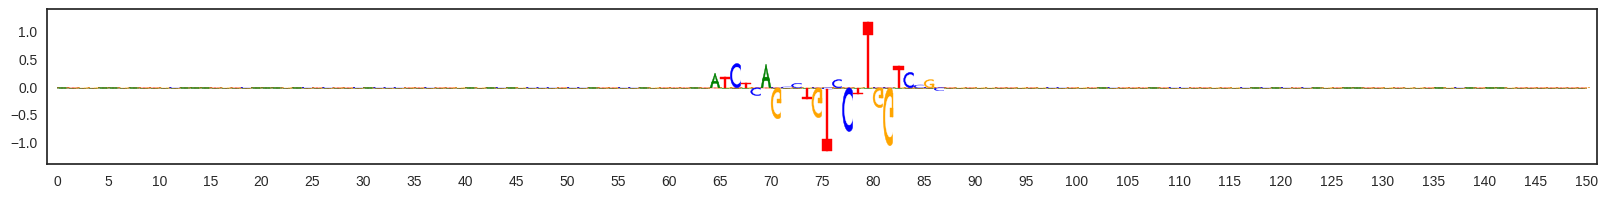

Emvar status 0


In [151]:
diffs= visualize_idx(0,scores_ref,scores_alt,mutObj.ref_tensor,mutObj.alt_tensor, Z)

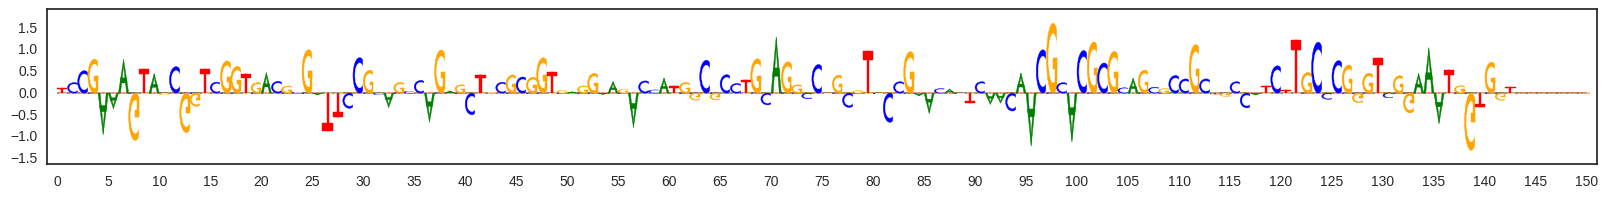

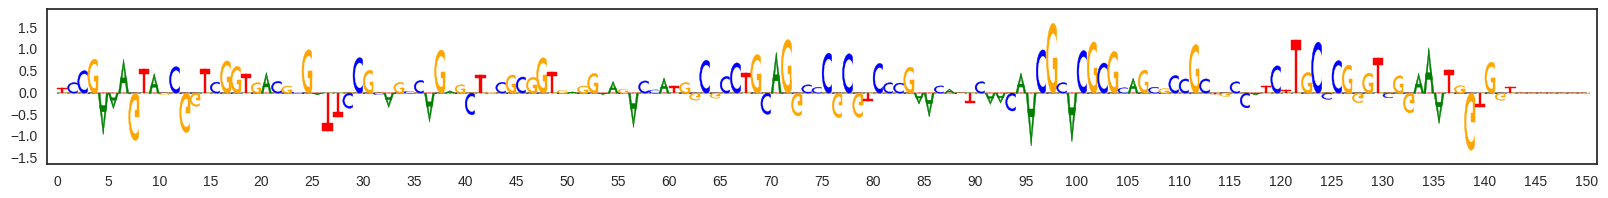

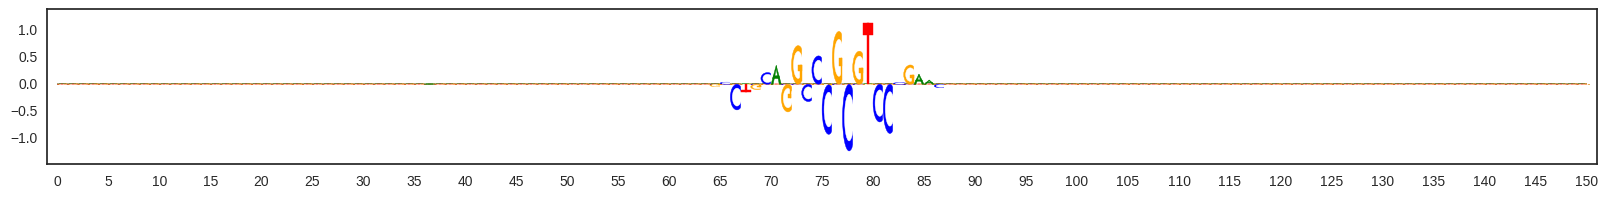

Emvar status 1


In [134]:
visualize_idx(1,scores_ref,scores_alt,mutObj.ref_tensor,mutObj.alt_tensor, Z)

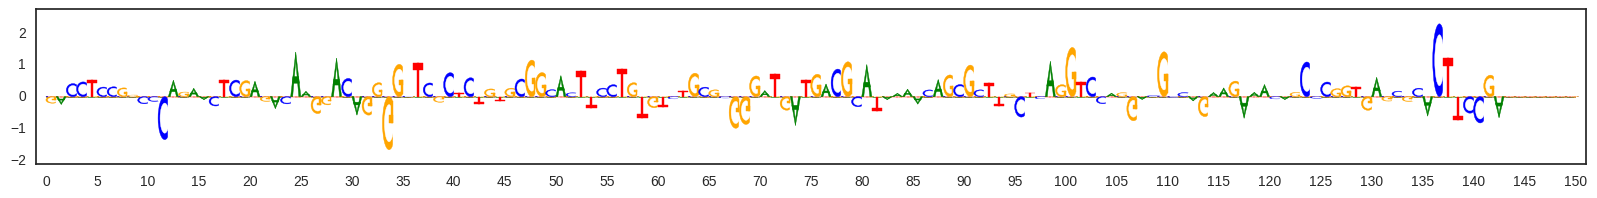

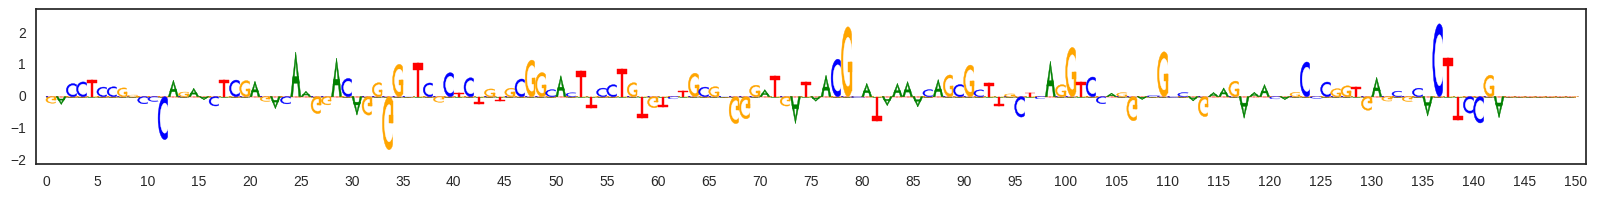

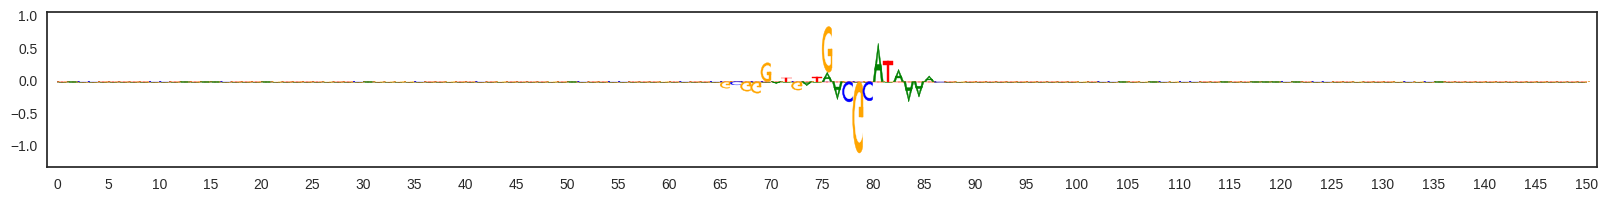

Emvar status 1


In [135]:
visualize_idx(2,scores_ref,scores_alt,mutObj.ref_tensor,mutObj.alt_tensor, Z)

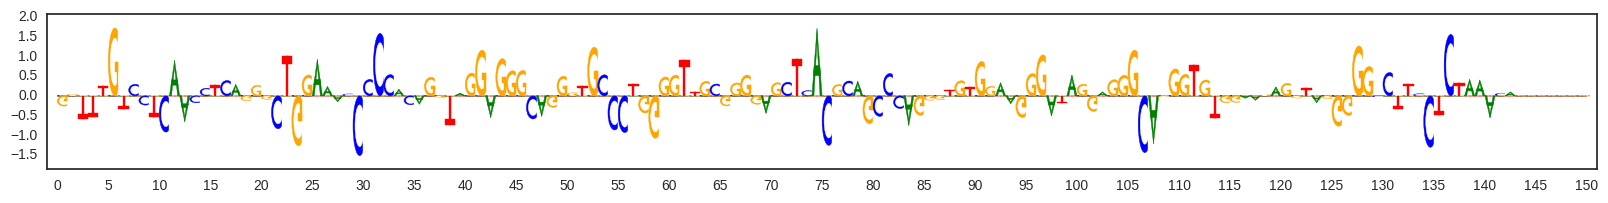

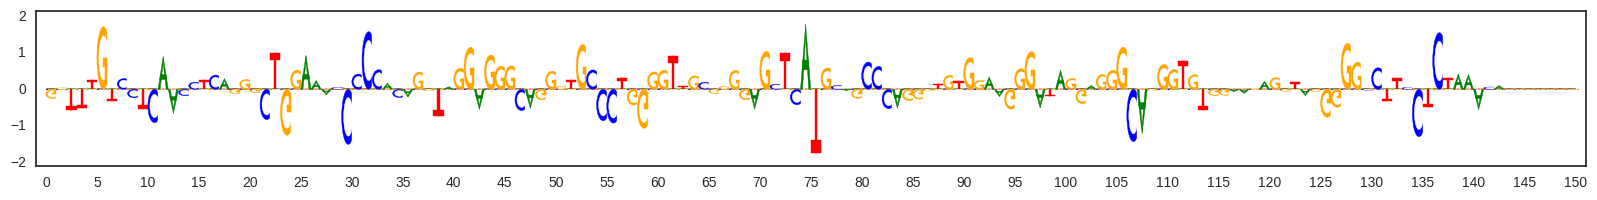

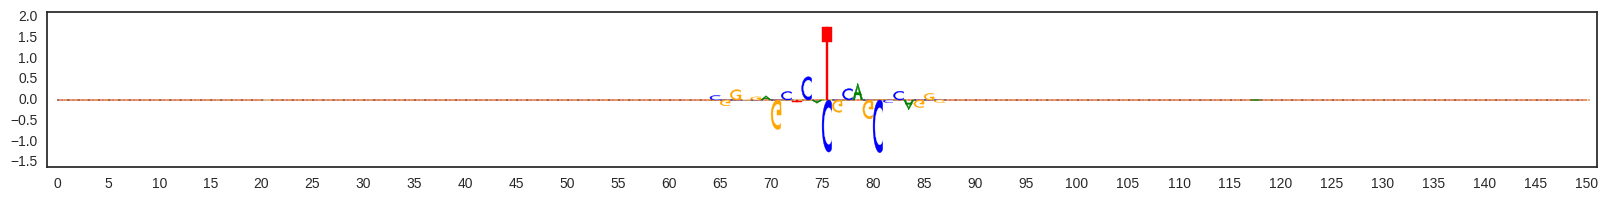

Emvar status 0


In [136]:
visualize_idx(3,scores_ref,scores_alt,mutObj.ref_tensor,mutObj.alt_tensor, Z)

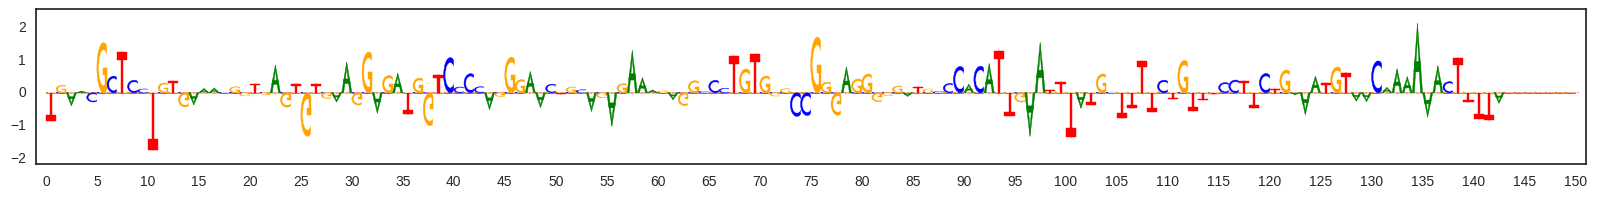

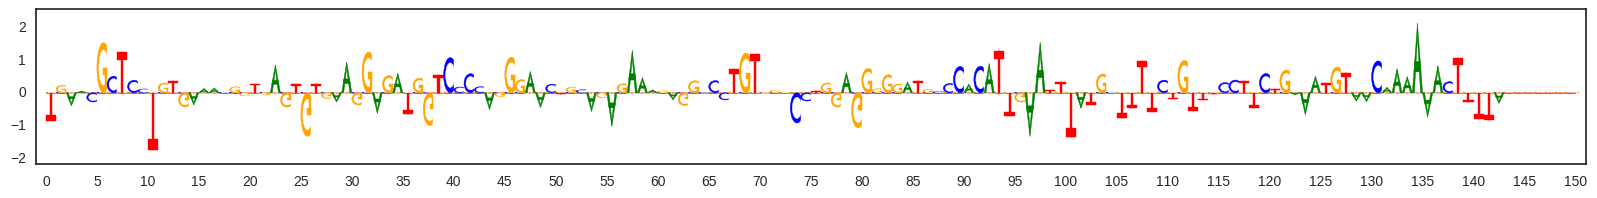

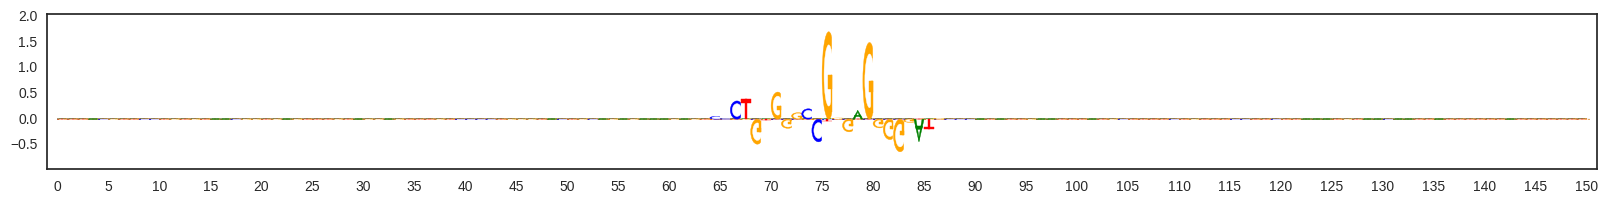

Emvar status 0


In [137]:
visualize_idx(4,scores_ref,scores_alt,mutObj.ref_tensor,mutObj.alt_tensor, Z)

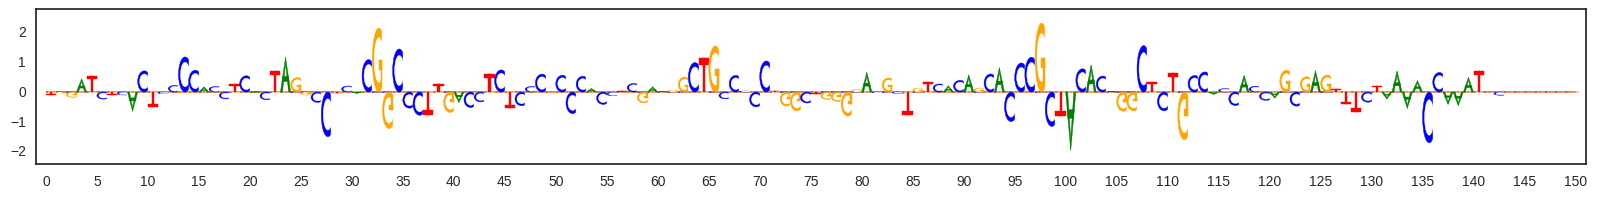

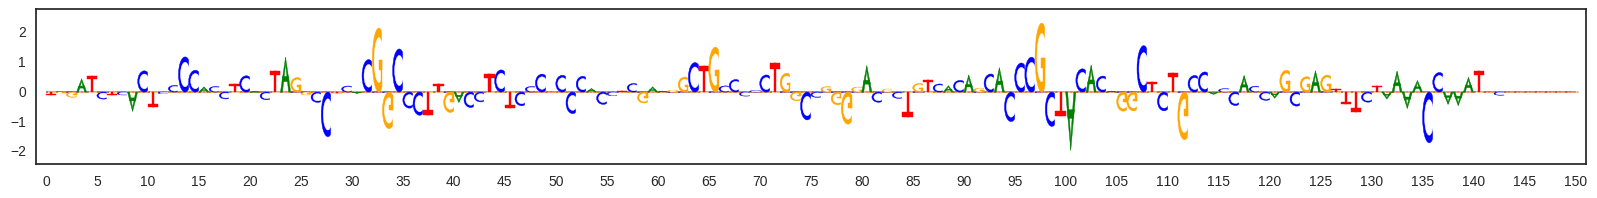

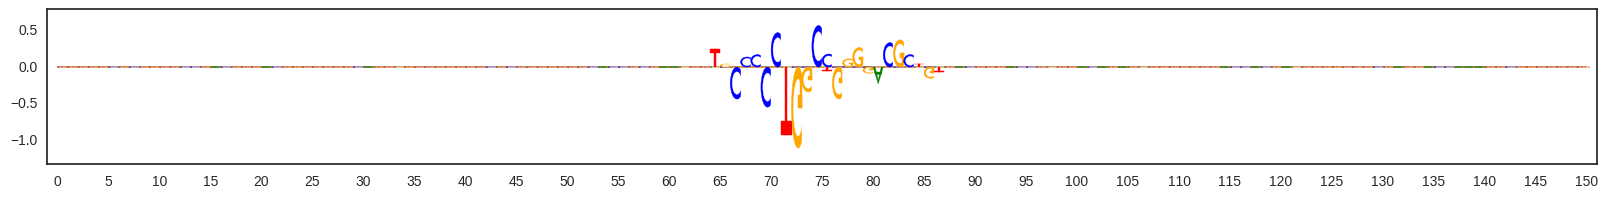

Emvar status 0


In [138]:
visualize_idx(5,scores_ref,scores_alt,mutObj.ref_tensor,mutObj.alt_tensor, Z)

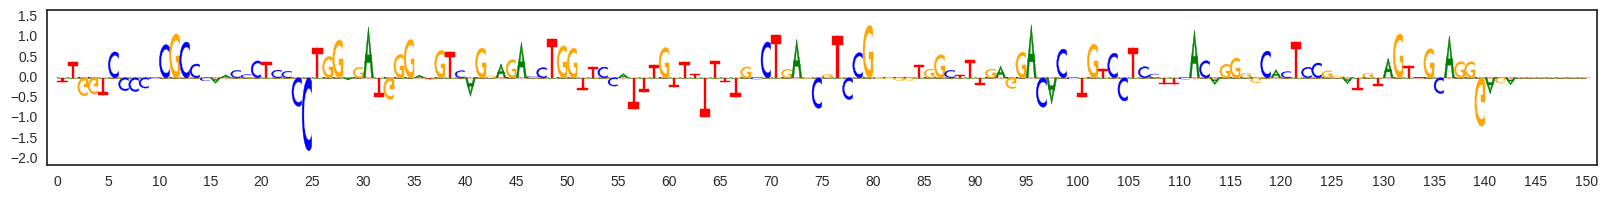

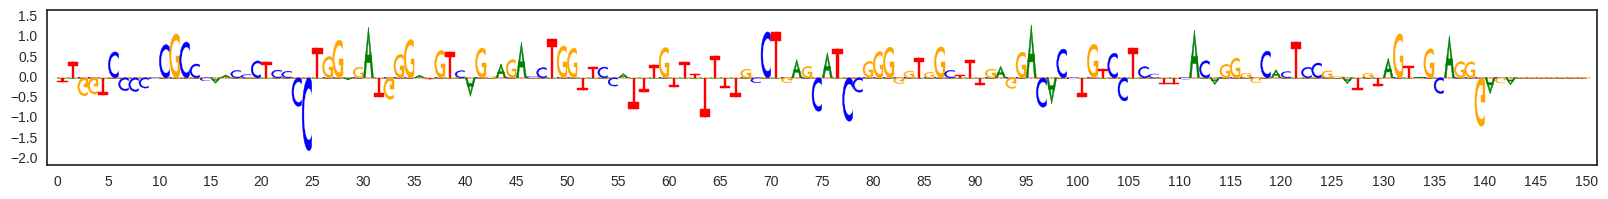

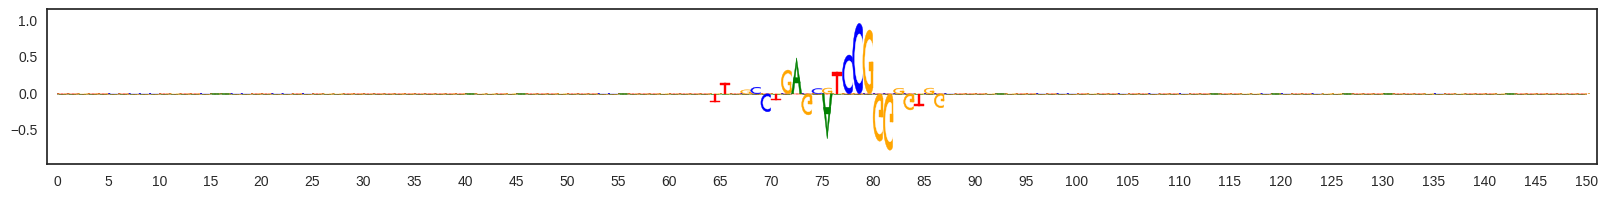

Emvar status 0


In [140]:
visualize_idx(6,scores_ref,scores_alt,mutObj.ref_tensor,mutObj.alt_tensor, Z)

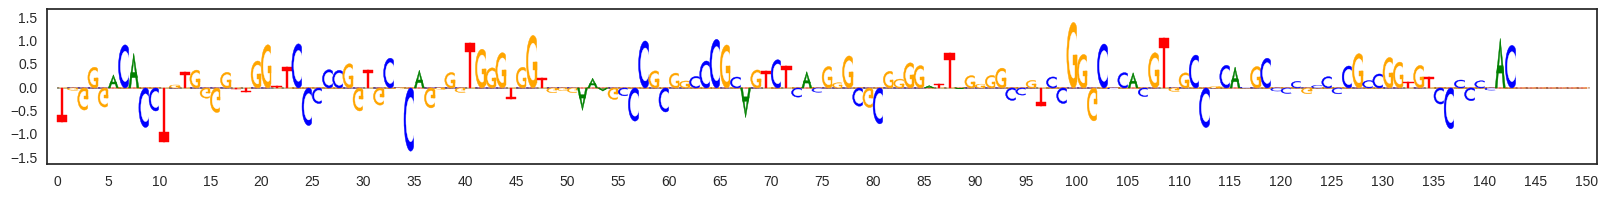

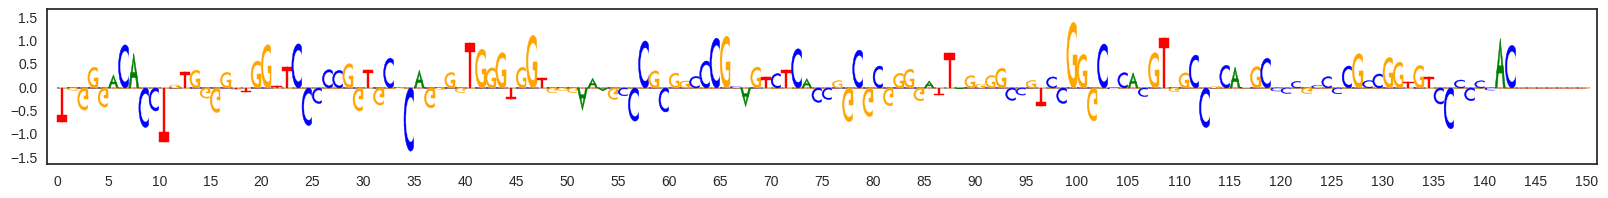

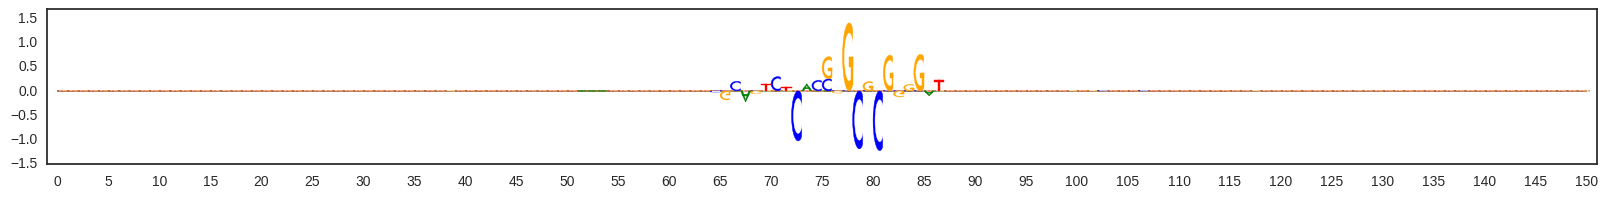

Emvar status 0


In [141]:
visualize_idx(7,scores_ref,scores_alt,mutObj.ref_tensor,mutObj.alt_tensor, Z)

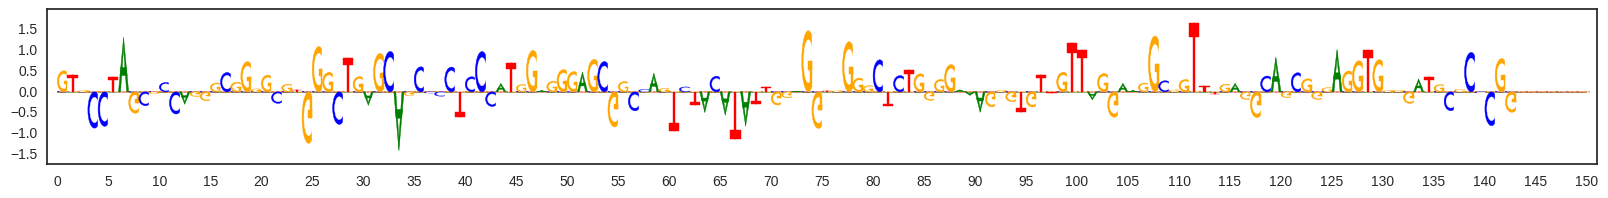

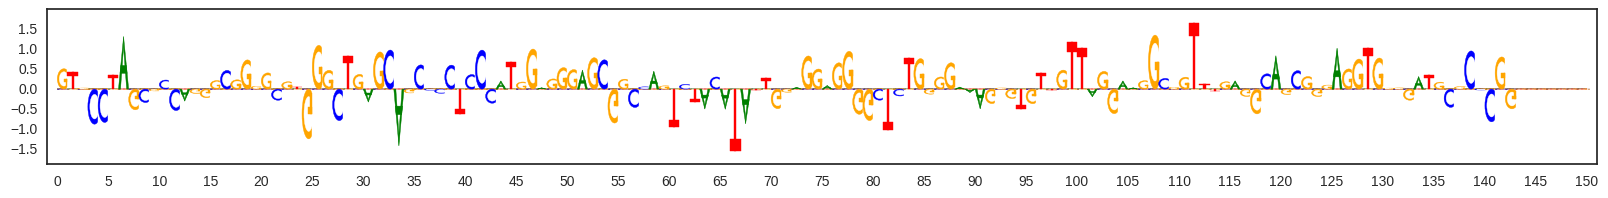

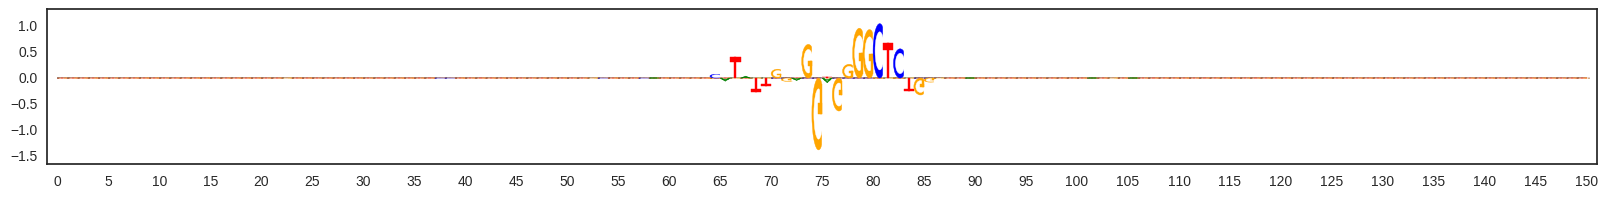

Emvar status 0


In [142]:
visualize_idx(8,scores_ref,scores_alt,mutObj.ref_tensor,mutObj.alt_tensor, Z)

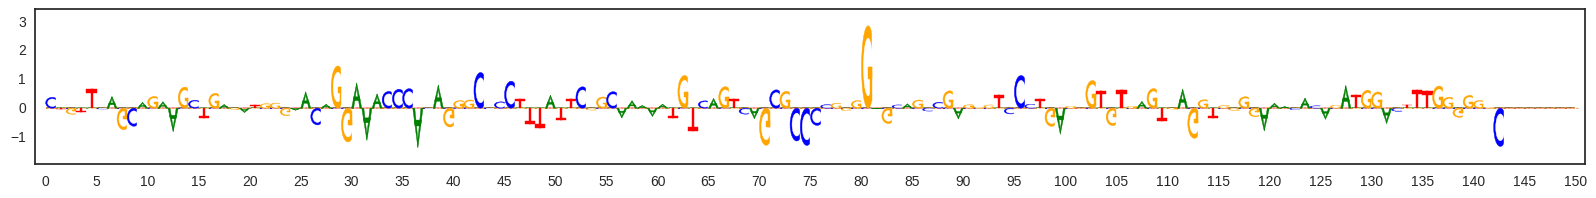

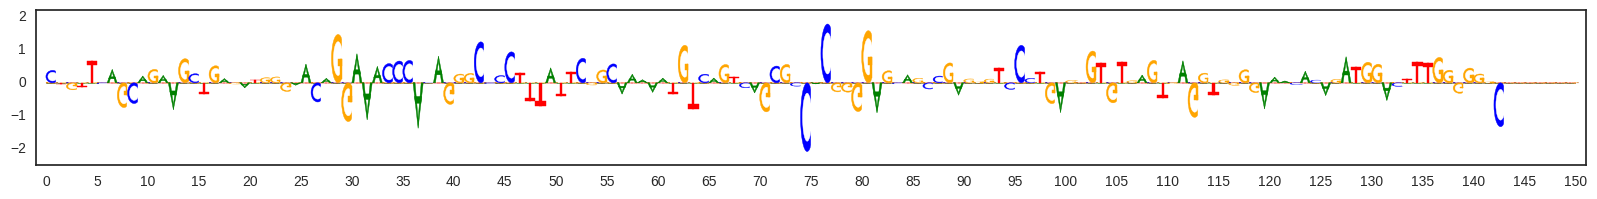

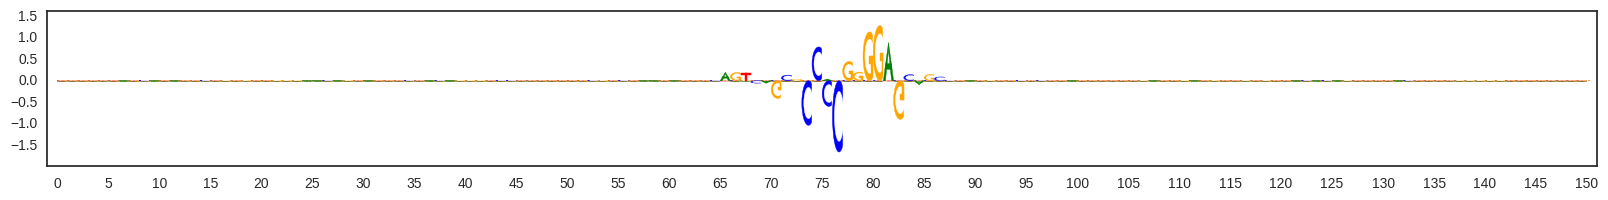

Emvar status 0


In [143]:
visualize_idx(9,scores_ref,scores_alt,mutObj.ref_tensor,mutObj.alt_tensor, Z)

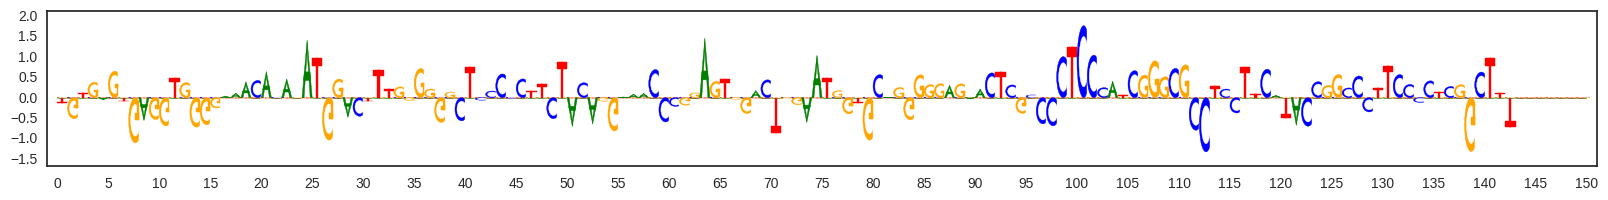

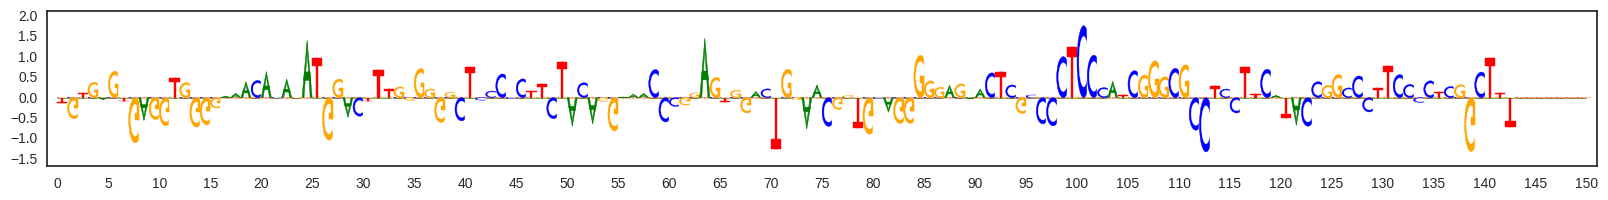

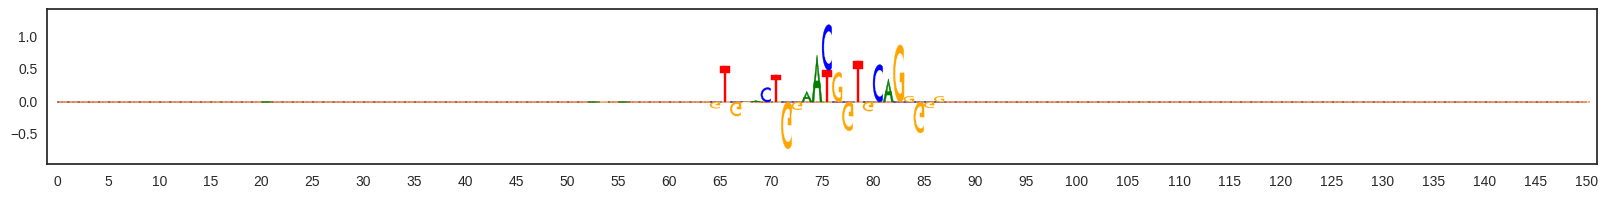

Emvar status 0


In [144]:
visualize_idx(10,scores_ref,scores_alt,mutObj.ref_tensor,mutObj.alt_tensor, Z)

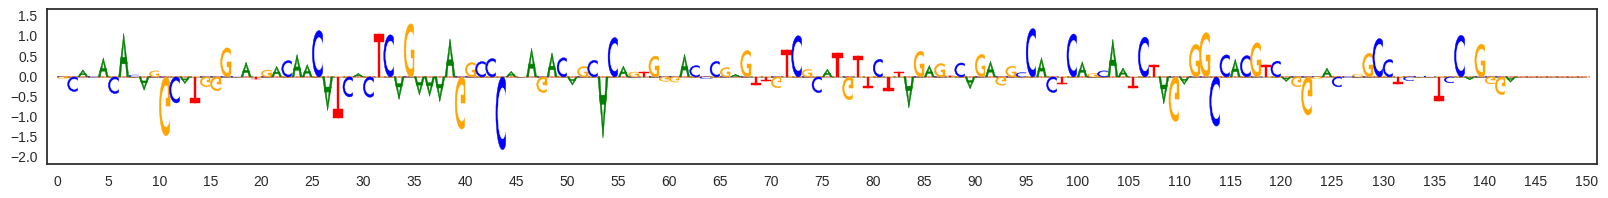

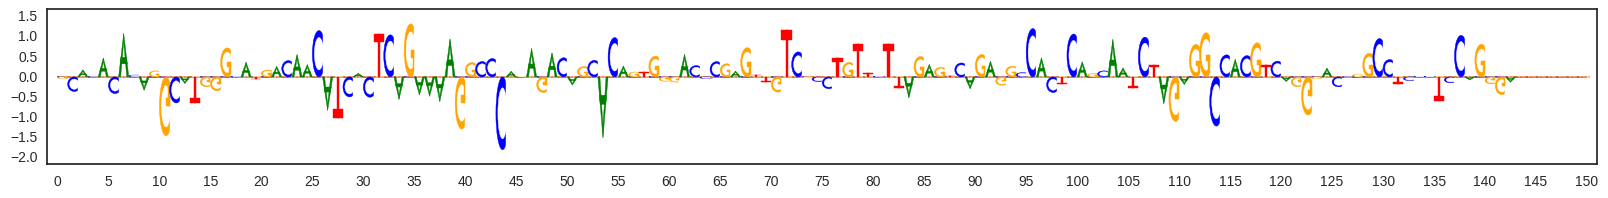

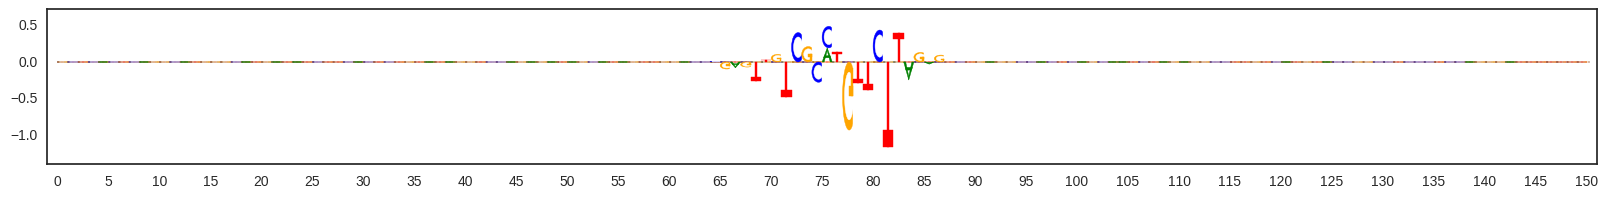

Emvar status 1


In [145]:
visualize_idx(11,scores_ref,scores_alt,mutObj.ref_tensor,mutObj.alt_tensor, Z)

In [153]:
a = np.asarray(diffs)

In [160]:
def scorediff(score1, score2, tensor1, tensor2, Z):
    diffs = []
    merged_diffs = []
    for idx in range(score1.shape[0]):
        plot1 = tensor1[idx] * score1[idx]
        plot2 = tensor2[idx] * score2[idx]
        plotdiff = plot1-plot2
        diffs.append(plotdiff)
        merged_diff = np.sum(plotdiff, axis = 1).flatten()
        merged_diffs.append(merged_diff)
    return np.asarray(diffs), np.asarray(merged_diffs)
    #print("Emvar status %i"%(Z.flatten()[idx]))
t_diff, m_diff = scorediff(scores_ref,scores_alt,mutObj.ref_tensor,mutObj.alt_tensor, Z)

In [162]:
trunc_m_diff = m_diff[:,60:91]

In [163]:
trunc_m_diff.shape

(2610, 31)

In [166]:
lr_weight_pos = len(Z) / np.sum(Z)
lr_weight_neg = len(Z) / (len(Z) - np.sum(Z))
Z = np.asarray(Z)

In [248]:
from sklearn import metrics


In [280]:
sss = StratifiedShuffleSplit(n_splits=1, test_size=0.15, random_state=5)
for train_index, test_index in sss.split(trunc_m_diff, Z):
    X_train, X_test = trunc_m_diff[train_index], trunc_m_diff[test_index]
    Y_train, Y_test = Z[train_index], Z[test_index]


In [59]:
abcdef = abcde[:,]

(2610, 150)

In [58]:
abcde = abcd[:,0,:]

In [282]:
from sklearn.linear_model import LogisticRegressionCV, LogisticRegression

In [283]:
linregobj = LogisticRegressionCV(Cs= 10, cv = 100, class_weight='balanced', penalty = 'l2')
linregobj.fit(X_train, Y_train.ravel().astype(bool))

LogisticRegressionCV(Cs=10, class_weight='balanced', cv=100, dual=False,
           fit_intercept=True, intercept_scaling=1.0, max_iter=100,
           multi_class='ovr', n_jobs=1, penalty='l2', random_state=None,
           refit=True, scoring=None, solver='lbfgs', tol=0.0001, verbose=0)

In [284]:
Predicted = linregobj.predict(X_test)

In [285]:
Predicteda =  linregobj.predict_proba(X_test)

In [286]:
classObj.binary(Y_test.flatten().astype(bool), Predicted)

[('Loss', 14.185836088887692),
 ('Balanced_accuracy', 62.062687419677282),
 ('auROC', 0.62062687419677287),
 ('auPRC', 0.54279340213990668),
 ('auPRG', 0.32814484927832643),
 ('Recall_at_5%_FDR', 0.0),
 ('Recall_at_10%_FDR', 0.0),
 ('Recall_at_20%_FDR', 0.0),
 ('Num_Positives', 94),
 ('Num_Negatives', 298)]

In [287]:
classObj.binary(Y_test.flatten().astype(bool), Predicteda[:,1])

[('Loss', 0.6864102013527319),
 ('Balanced_accuracy', 62.062687419677282),
 ('auROC', 0.59777952306154503),
 ('auPRC', 0.29853411225878557),
 ('auPRG', 0.28949268185411792),
 ('Recall_at_5%_FDR', 0.0),
 ('Recall_at_10%_FDR', 0.0),
 ('Recall_at_20%_FDR', 0.0),
 ('Num_Positives', 94),
 ('Num_Negatives', 298)]

In [249]:
fpr, tpr, _ = metrics.roc_curve(Y_test.flatten().astype(bool), Predicteda[:,1])


In [250]:
auc = metrics.auc(fpr,tpr)
print(auc)

0.597815222048


In [289]:
X_train.shape

(2218, 31)

In [115]:
binObj.model.count_params()

258431